In [3]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [14]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [15]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT ct.type as "기업 규모", ROUND(AVG(c.income), 0) as "매출(만)"
                FROM comp_type ct, company_info c 
                WHERE ct.comp_type_id = c.type_id
                AND c.income > 0 
                AND (ct.type != "정보없음" AND ct.type != "기타")
                GROUP BY ct.type
                """)

In [16]:
result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,스타트업,679417
1,중소기업,520835
2,중견기업,850000


In [17]:
df.columns = ["기업규모", "매출평균"]

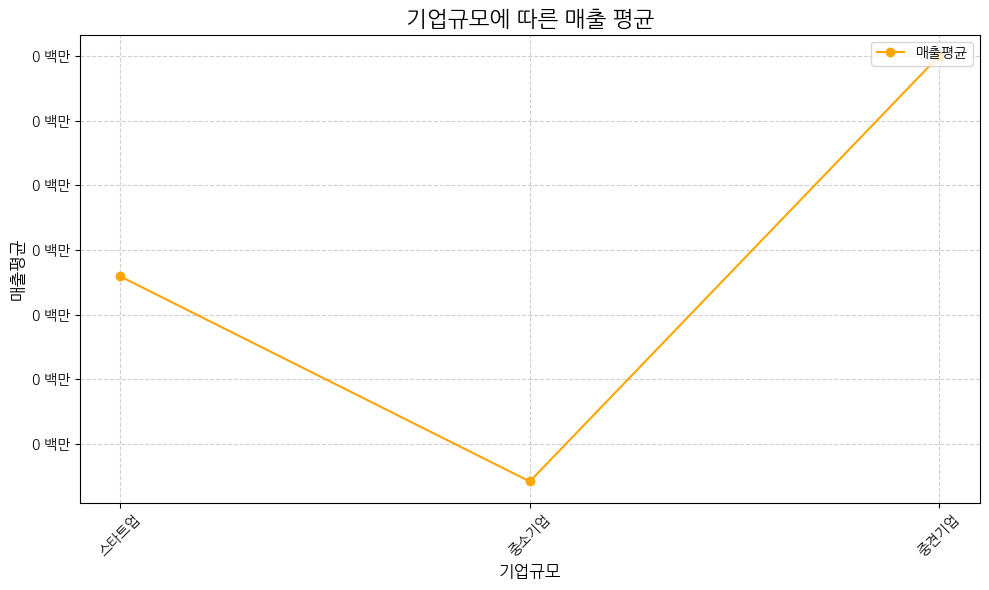

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df["기업규모"], df["매출평균"], marker='o', linestyle='-', color='orange', label='매출평균')

# 그래프 꾸미기
plt.title("기업규모에 따른 매출 평균", fontsize=16)
plt.xlabel("기업규모", fontsize=12)
plt.ylabel("매출평균", fontsize=12)
plt.xticks(df["기업규모"], rotation=45)

# Y축을 "백만" 단위로 변환
def millions_formatter(x, pos):
    return f'{int(x / 1e6)} 백만'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="upper right")
plt.tight_layout()

# 그래프 출력
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    3 non-null      object
 1   매출평균    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


<function matplotlib.pyplot.show(close=None, block=None)>

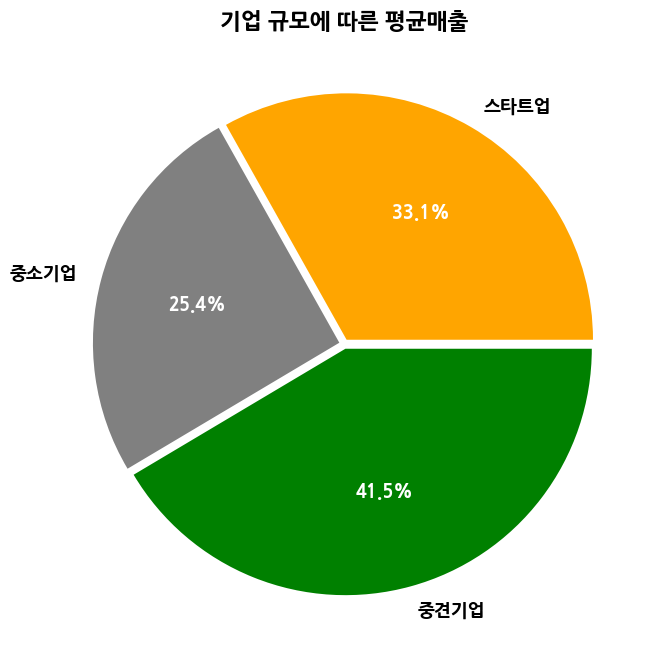

In [49]:
x = df["매출평균"]
labels = df["기업규모"]

plt.figure(figsize=(10, 8))
wedges, texts, pie_text = plt.pie(x=x, labels=labels, explode=[0.02,0.02, 0.02], autopct='%1.1f%%', colors=["orange", "gray", "green"],textprops={'fontsize' : 13, "color" : "black", "weight" :"bold"} )
plt.title("기업 규모에 따른 평균매출", fontsize = 16, fontweight="bold")

for row in pie_text:
    row.set_color("white")

plt.show
